# Intervalli di confidenza

Esiste una procedura più rigorosa rispetto all'approssimazione parabolica per definire l'intervallo che rappresenta l'incertezza sulla stima di un parametro.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
from scipy.optimize import fsolve

Consideriamo una distribuzione normale con $\sigma=1$ e $\mu$ ignoto. Se misuriamo $x=x^\star$, l'intervallo di incertezza per $\mu$ viene riportato com come $[x^\star - \sigma, x^\star + \sigma]$.

Possiamo immaginare di costruire questa stima nel modo seguente:

1. al variare del valore vero $\mu$, viene calcolato l'intervallo centrale corrispondente al 68.27% di probabilità, ossia $[\mu - \sigma, \mu + \sigma]$.
* l'insieme di tutti gli intervalli determina una fascia di confidenza (*confidence band* o *confidence belt* in inglese);
* dato il valore osservato $x=x^\star$, si può *invertire* la fascia di condidenza trovando l'intersezione con la retta verticale corrispondente a $x=x^\star$;
* l'intersezione viene riportata come intervallo di confidenza per $\mu$. In questo caso, l'intevallo è $[x^\star - \sigma, x^\star + \sigma]$.

Questo metodo è generalizzabile a PDF meno regolari del caso normale che abbiamo esaminato.

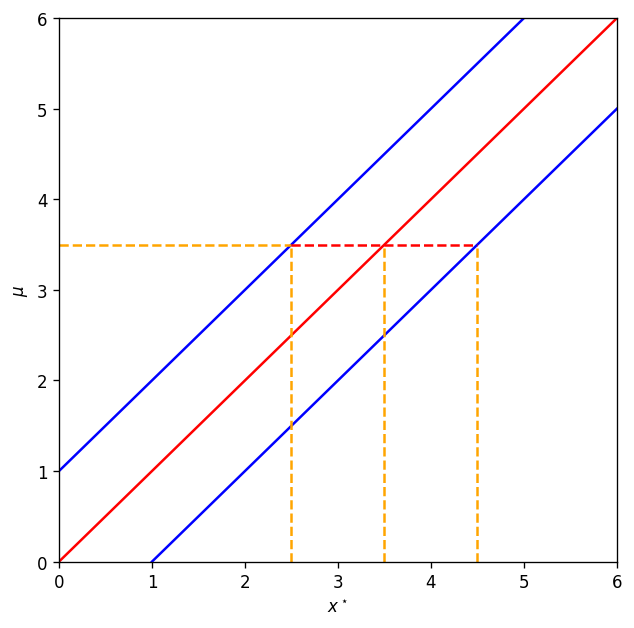

In [2]:
plt.figure(figsize=(6,6), dpi=120)
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\mu$')
plt.plot([0, 6], [0, 6], color='red')
plt.plot([0, 5], [1, 6], color='blue')
plt.plot([1, 6], [0, 5], color='blue')
mu_0 = x_hat = 3.5
x_lo, x_hi = mu_0 - 1, mu_0 + 1
plt.plot([0, x_lo], [mu_0, mu_0], color='orange', linestyle='--')
plt.plot([x_lo, x_hi], [mu_0, mu_0], color='red', linestyle='--')
plt.plot([x_hi, x_hi], [0, mu_0], color='orange', linestyle='--')
plt.plot([x_lo, x_lo], [0, mu_0], color='orange', linestyle='--')
plt.plot([x_hat, x_hat], [0, mu_0], color='orange', linestyle='--')
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.show()

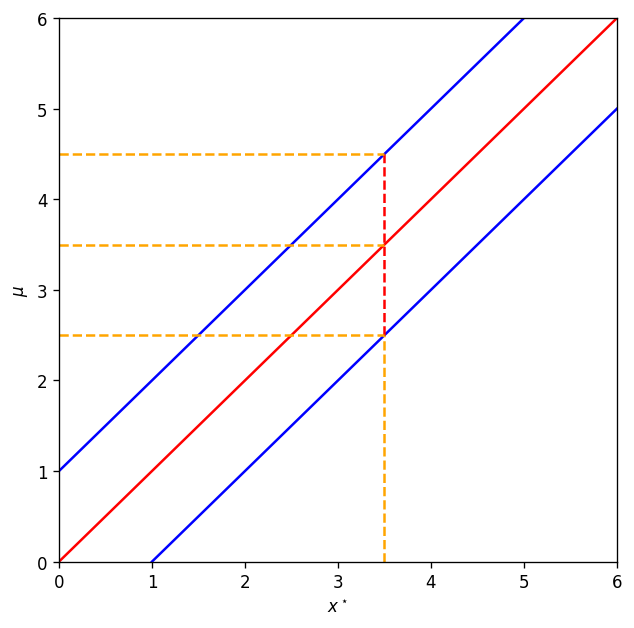

In [3]:
plt.figure(figsize=(6,6), dpi=120)
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\mu$')
plt.plot([0, 6], [0, 6], color='red')
plt.plot([0, 5], [1, 6], color='blue')
plt.plot([1, 6], [0, 5], color='blue')
x_obs = mu_hat = 3.5
mu_lo, mu_hi = mu_hat - 1, mu_hat + 1
plt.plot([x_obs, x_obs], [0, mu_lo], color='orange', linestyle='--')
plt.plot([x_obs, x_obs], [mu_lo, mu_hi], color='red', linestyle='--')
plt.plot([0, x_obs], [mu_hat, mu_hat], color='orange', linestyle='--')
plt.plot([0, x_obs], [mu_lo, mu_lo], color='orange', linestyle='--')
plt.plot([0, x_obs], [mu_hi, mu_hi], color='orange', linestyle='--')
plt.ylim(0, 6)
plt.xlim(0, 6)
plt.show()

Immaginiamo inveec di stimare il parametro di scala $\theta$ di una distribuzione gamma:

$\displaystyle f(x;\kappa,\theta) = \frac{x^{\kappa-1}e^{-x/\theta}}{\theta^\kappa\,\Gamma(\kappa)}$

Immaginiamo che il parametro $\kappa$ sia noto, ad es.: $\kappa=3$.

La *moda* si può dimostrare essere:

$x^\star = \theta\,(\kappa-1)$

Se abbiamo quindi un'osservazione $x$, la stima di massima verosimiglianza di $\theta$ si ottiene ponendo $x^\star=x$, ossia:

$\displaystyle \theta=\frac{x}{\kappa-1}$

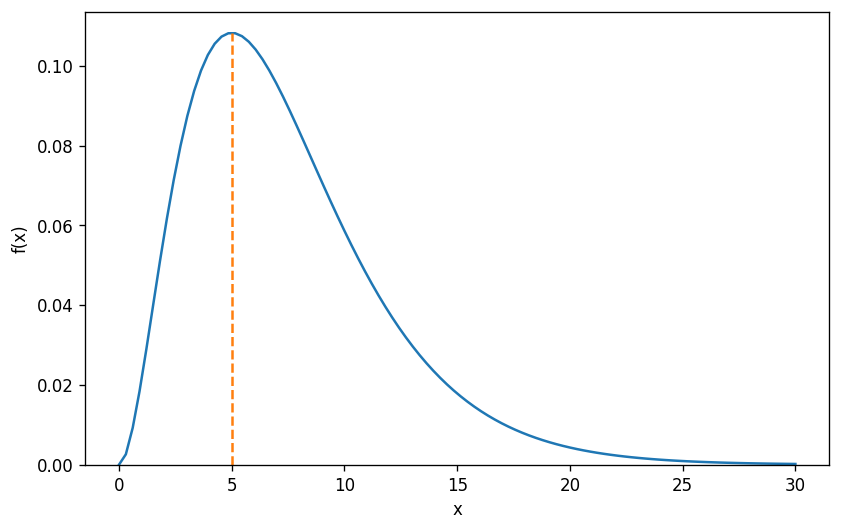

In [4]:
xrange=(0,30)
x = np.linspace(xrange[0], xrange[1], 100)
k = 3
theta=2.5
model = gamma(k, scale=theta)
y = model.pdf(x)
mode=theta*(k-1)
plt.figure(figsize=(8,5), dpi=120)
plt.plot(x,y)
plt.ylim(bottom=0)
plt.plot([mode,mode], [0, model.pdf(mode)], label='mode', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Calcoliamo un intervallo che corrisponde ad una probabilità del 68.27%.

<span style="color:blue">Fissato il **livello di confidenza** (*confidence level* o **CL** in inglese), esistono più modi per scegliere un untervallo corrispondente alla probabilità voluta.
Ad esempio, possiamo scegliere code simmetriche con aree uguali. Ma non è l'unica scelta possibile.</span>

[3.42, 11.59]


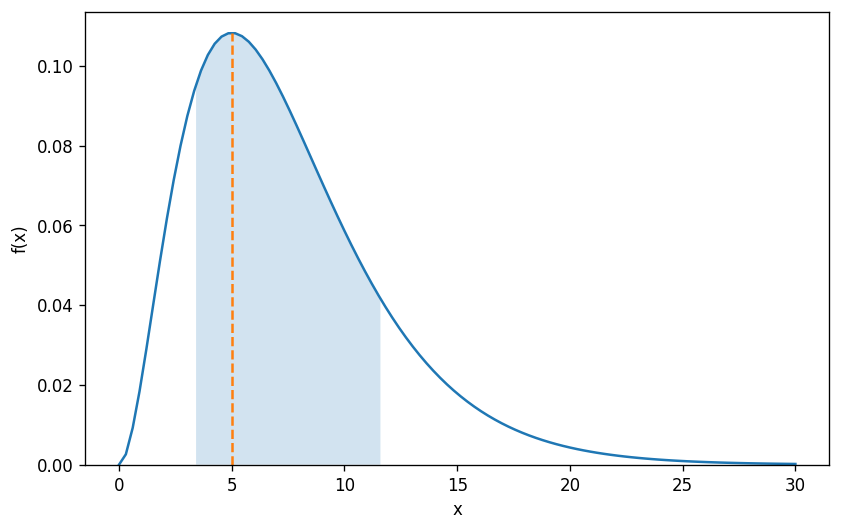

In [5]:
p_lo = (1-.6827)/2
p_hi = 1 - p_lo
x_lo = fsolve(lambda x: model.cdf(x)-p_lo, 0)[0]
x_hi = fsolve(lambda x: model.cdf(x)-p_hi, 100)[0]
print("[{:.2f}, {:.2f}]".format(x_lo, x_hi))
x_ab = np.linspace(x_lo, x_hi, 100)
y_ab = model.pdf(x_ab)
plt.figure(figsize=(8,5), dpi=120)
plt.plot(x,y)
plt.ylim(bottom=0)
plt.plot([mode,mode], [0, gamma.pdf(mode, k, scale=theta)], label='mode', linestyle='--')
plt.fill_between(x_ab, y_ab, alpha=0.2)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Calcoliamo la **banda di confidenza** al 68% di **livello di confidenza** (CL).

Visto che abbiamo modificato solo il parametro di scala, è naturale che la banda di confidenza sia uno "spicchio" nel piano $(\hat{x}, \theta)$.

In [6]:
def interval(theta):
    x_hat=theta*(k-1)
    model = gamma(k, scale=theta)
    x_lo = fsolve(lambda x: model.cdf(x)-p_lo, 0)[0]
    x_hi = fsolve(lambda x: model.cdf(x)-p_hi, 1)[0]
    return theta, x_hat, x_lo, x_hi

In [7]:
band = [interval(theta) for theta in np.arange(0.05, 2, 0.05)]

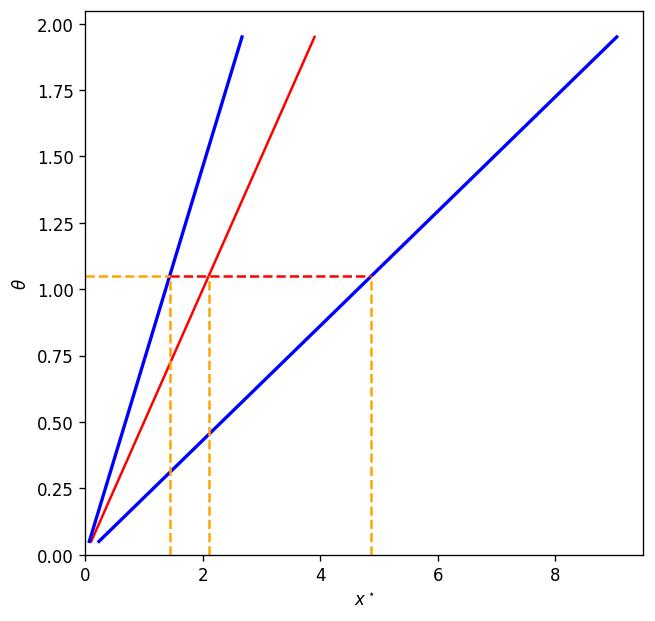

In [8]:
from scipy.interpolate import interp1d
theta = [i[0] for i in band]
x_hat = [i[1] for i in band]
x_lo = [i[2] for i in band]
x_hi = [i[3] for i in band]
band_lo=interp1d(x_lo, theta)
band_hi=interp1d(x_hi, theta)
plt.figure(figsize=(6,6), dpi=120)
plt.plot(x_hat, theta, linestyle='-', color='r')
plt.plot(x_lo, theta, color='b', linewidth=2)
plt.plot(x_hi, theta, color='b', linewidth=2)
pos=20
theta_0 = theta[pos]
plt.plot([0, x_lo[pos]], [theta_0, theta_0], color='orange', linestyle='--')
plt.plot([x_lo[pos], x_hi[pos]], [theta_0, theta_0], color='red', linestyle='--')
plt.plot([x_hi[pos], x_hi[pos]], [0, theta_0], color='orange', linestyle='--')
plt.plot([x_lo[pos], x_lo[pos]], [0, theta_0], color='orange', linestyle='--')
plt.plot([x_hat[pos], x_hat[pos]], [0, theta_0], color='orange', linestyle='--')
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\theta$')
plt.ylim(0)
plt.xlim(0)
plt.show()

Possiamo costruire l'**intervallo di confidenza** al 68% CL invertendo la banda di confidenza:

In [9]:
x_obs = 1.8
# notare l'inversione tra lo e hi:
theta_lo, theta_hi = band_hi(x_obs), band_lo(x_obs)
theta_hat = x_obs/(k-1)
err_lo, err_hi = theta_hat - theta_lo, theta_hi - theta_hat
print("theta interval: [{:.2f}, {:.2f}] at 68% CL".format(theta_lo, theta_hi))
print("theta = {:.2f} +{:.2f}/-{:.2f}".format(theta_hat, err_lo, err_hi))

theta interval: [0.39, 1.32] at 68% CL
theta = 0.90 +0.51/-0.42


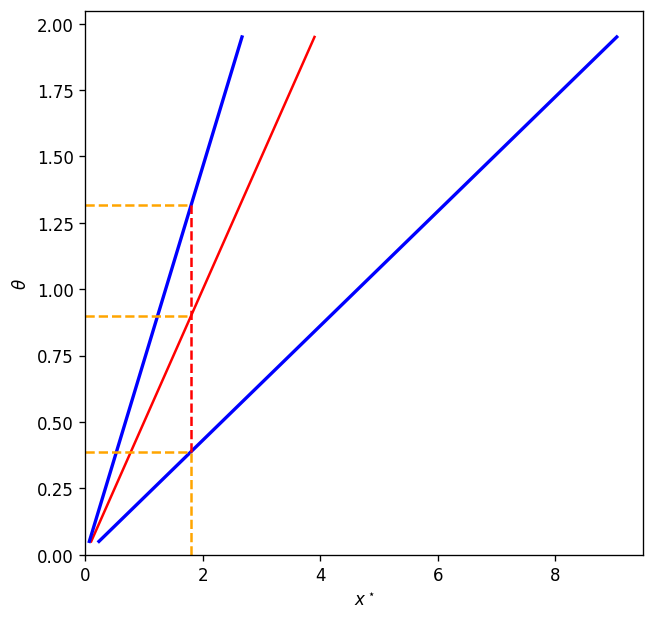

In [10]:
plt.figure(figsize=(6,6), dpi=120)
plt.plot(x_hat, theta, linestyle='-', color='r')
plt.plot(x_lo, theta, color='b', linewidth=2)
plt.plot(x_hi, theta, color='b', linewidth=2)
plt.plot([x_obs, x_obs], [0, theta_lo], color='orange', linestyle='--')
plt.plot([x_obs, x_obs], [theta_lo, theta_hi], color='red', linestyle='--')
plt.plot([0, x_obs], [theta_hat, theta_hat], color='orange', linestyle='--')
plt.plot([0, x_obs], [theta_lo, theta_lo], color='orange', linestyle='--')
plt.plot([0, x_obs], [theta_hi, theta_hi], color='orange', linestyle='--')
plt.xlabel(r'$x^\star$')
plt.ylabel(r'$\theta$')
plt.ylim(0)
plt.xlim(0)
plt.show()

## *Coverage*

Per costruzione la probabilità che l'intervallo *copra* il valore vero è il 68%, per costruzione della cintura di confidenza. Questa proprietà prende il nome, in inglese, di **coverage**.

# Spunti per esercizi

* Ripetere il calcolo dell'intervallo di confidenza per una PDF che segua la distribuzione *beta* data da:

$\displaystyle f(x; \alpha, \beta) = \frac{x^{\alpha-1}(1-x)^{\beta-1}}{B(\alpha,\beta)}$

Il parametro $\beta$ è vincolato ad essere pari a $\theta-\alpha$, con $\theta$ fissato (es.: $\theta=10$) in modo che ci sia un solo parametro da determinare ($\alpha$).

Si può usare l'impementazione [```beta```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.beta.html) di ```scipy```.

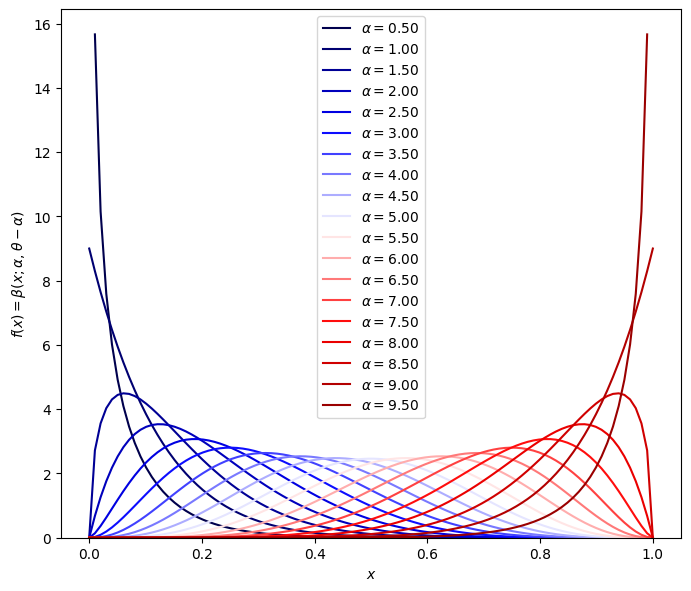

In [11]:
from scipy.stats import beta
x = np.linspace(0, 1, 100)
theta = 10
plt.figure(figsize=(8,7), dpi=100)
colormap =plt.get_cmap('seismic')
a_range = np.arange(0.5, 10, 0.5)
colors = np.linspace(0, 1, len(a_range)+1)
for a, c in zip(a_range, colors):
    b = theta-a
    model = beta(a, b)
    y = model.pdf(x)
    plt.plot(x,y,label=r"$\alpha={:.2f}$".format(a), color=colormap(c))
plt.ylim(bottom=0)
plt.xlabel('$x$')
plt.ylabel(r'$f(x)=\beta(x;\alpha, \theta-\alpha)$')
plt.legend()
plt.show()